# **0. Installing required dependencies 📚**

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from sklearn.preprocessing import  MinMaxScaler

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **1.Data Colecction 🔍**

In [4]:
dataset = pd.read_csv('MovieReviews_Augmented.csv')

In [5]:
dataset.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
dataset['Type'].value_counts()

Type
positive    66
negative    66
neutral     66
Name: count, dtype: int64

In [7]:
len(dataset['Type'])

198

# **2.Data Preprocessing 📊**

In [8]:

def preprocess_tokens(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    # Remove special characters and punctuation using regular expression
    words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in words]  # Removes numbers and special characters
    without_stop_words = [w for w in words if not w.lower() in stop_words]
    stemming = SnowballStemmer('english')
    stemmed_words = [stemming.stem(w) for w in without_stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    return lemmatized_words

def preprocess_text(text):
    clean_sentence = preprocess_tokens(text)
    return ' '.join(clean_sentence)

In [9]:
#dataset['text'] = dataset['text'].apply(Preprocessing_data)
dataset['processed_tokens'] = dataset['text'].apply(preprocess_tokens)
dataset['processed_text'] = dataset['text'].apply(preprocess_text)

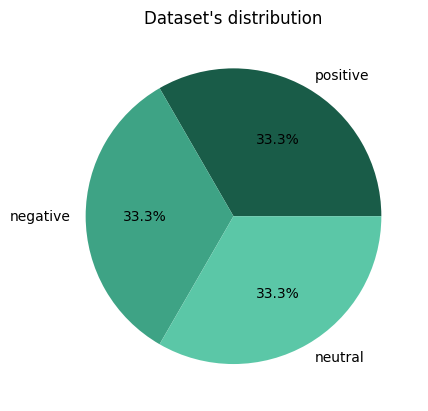

In [10]:
# Displays a Pie chart of the distribution of instances
x = dataset['Type'].value_counts()
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%', colors=['#195C48', '#3EA385', '#5BC7A7'])
plt.title("Dataset's distribution")
plt.show()

# **3.Feature Extraction 💡**

**3.1 Feature Extraction; Bag Of Words (BOW)**

In [ ]:
# BOW Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_features = cv.fit_transform(dataset['processed_text'])

In [12]:
dataframeBOW = pd.DataFrame(cv_features.toarray(), columns = cv.get_feature_names_out())
# Concatenate BOW features with original DataFrame
dataset_bow = pd.concat([dataset.reset_index(drop=True), dataframeBOW], axis=1)
#dataframeBOW.head(214)
print(dataset_bow.shape)
dataset_bow.head(247)

(198, 2460)


,text,Type,processed_tokens,processed_text,10,100,1010,103,11,110,...,yes,yet,york,young,younger,youself,youwant,yr,zellweg,zoo
0,"Marlin, a nervous and neurotic clownfish is he...",positive,"[marlin, , nervous, neurot, clownfish, heavili...",marlin nervous neurot clownfish heavili overp...,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Yes you read that correctly.Finding Nemo had b...,positive,"[yes, read, correctlyfind, nemo, brilliant, , ...",yes read correctlyfind nemo brilliant breatht...,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,I didn't see this movie until it came out on D...,positive,"[nt, see, movi, came, dvd, , famili, nt, go, m...",nt see movi came dvd famili nt go movi often ...,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Can Pixar and Disney miss with a film? Both To...,positive,"[pixar, disney, miss, film, , toy, stori, , bu...",pixar disney miss film toy stori bug life m...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Never, and I mean, never, in my entire life, h...",positive,"[never, , mean, , never, , entir, life, , movi...",never mean never entir life movi effect wa...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,"With such great actors in the casting, you mig...",neutral,"[great, actor, cast, , might, thought, bee, mo...",great actor cast might thought bee movi would...,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
194,"""Bee Movie"" is a witty animated film that expl...",neutral,"[, bee, movi, , witti, anim, film, explor, wor...",bee movi witti anim film explor world bee f...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,"""Bee Movie"" is a spirited animated film that e...",neutral,"[, bee, movi, , spirit, anim, film, explor, wo...",bee movi spirit anim film explor world bee ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,"In 1998, we had two films involving the life o...",neutral,"[1998, , two, film, involv, life, insect, antz...",1998 two film involv life insect antz woodi ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Splitting the dataset into training and testing sets (for BoW represntation)
from sklearn.model_selection import train_test_split
X_trainBoW, X_testBoW, y_trainBoW, y_testBoW = train_test_split(dataset_bow.drop(columns=['Type', 'text', 'processed_text','processed_tokens']), dataset_bow['Type'], test_size=0.2, random_state=42)


**Normalization for Bag of Word Features**

In [14]:
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFitTrainBoW=PredictorScaler.fit(X_trainBoW)

# Generating the standardized values of X_train
X_trainBoW=PredictorScalerFitTrainBoW.transform(X_trainBoW)

# Storing the fit object for later reference
PredictorScalerFitTestBow = PredictorScaler.fit(X_testBoW)

# Generating the standardized values of X_test
X_testBoW = PredictorScalerFitTestBow.transform(X_testBoW)

**3.2 Feature Extraction; Word Embedding using Word2Vec**

In [15]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [16]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [17]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [18]:
dataset['numRepresentaion_text'] = dataset['processed_tokens'].apply(sent_vec)
print(dataset['numRepresentaion_text'])

0      [0.021987193339579814, 0.041916058514569254, -...
1      [0.10620351938100961, 0.019786541278545674, 0....
2      [0.025377030806107953, 0.04039278897372159, -3...
3      [-0.004174537265423647, 0.05846041256619483, -...
4      [0.014766492341694078, 0.020658994975842927, 0...
                             ...                        
193    [0.011440135814525463, 0.051268400969328706, -...
194    [-0.02133002647986779, 0.05811368502103365, -0...
195    [0.00815174191497093, 0.06149646847747093, -0....
196    [-0.039912733920784885, 0.04582107898800872, -...
197    [-0.0668426513671875, 0.025841561953226726, -0...
Name: numRepresentaion_text, Length: 198, dtype: object


In [19]:
# Create a DataFrame from the Word2Vec representations
word2vec_df = pd.DataFrame(dataset['numRepresentaion_text'].tolist(), columns=[f'dim_{i+1}' for i in range(wv.vector_size)])
# print the Word2Vector representaion
# vector representation of each instance in the dataset
word2vec_df

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,dim_291,dim_292,dim_293,dim_294,dim_295,dim_296,dim_297,dim_298,dim_299,dim_300
0,0.021987,0.041916,-0.016586,0.085820,-0.065976,0.008457,0.056853,-0.026687,0.070104,0.043883,...,-0.047461,0.027849,-0.092177,-0.039959,-0.047207,-0.021066,-0.004782,-0.036736,0.013206,0.019992
1,0.106204,0.019787,0.031590,0.099013,-0.003648,0.011355,0.032677,-0.053042,0.045887,0.090079,...,-0.070000,0.036090,-0.106080,-0.009112,-0.046499,-0.065820,0.015334,-0.138402,-0.028106,-0.029681
2,0.025377,0.040393,-0.000037,0.107107,-0.065214,0.012517,0.053658,-0.035617,0.076000,0.053737,...,-0.010540,0.044914,-0.071556,0.008072,-0.009811,-0.072570,-0.012457,-0.047546,0.003528,0.011179
3,-0.004175,0.058460,-0.032179,0.085866,-0.065845,0.010026,-0.011768,-0.041714,0.043950,0.070518,...,-0.019458,0.019945,-0.087050,-0.025963,-0.022505,-0.042329,-0.005443,-0.024278,0.015109,-0.009448
4,0.014766,0.020659,0.009212,0.094623,-0.051746,0.011508,0.047893,-0.064530,0.061260,0.082185,...,-0.045926,0.072369,-0.094180,0.023540,-0.046439,-0.050676,-0.001250,-0.073860,0.009679,-0.009574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.011440,0.051268,-0.052509,0.105471,-0.052834,0.011426,0.032841,-0.025194,0.045425,0.034994,...,-0.060307,0.034569,-0.055521,-0.043488,-0.056968,-0.001341,-0.029418,-0.026433,0.004436,0.032156
194,-0.021330,0.058114,-0.023402,0.095628,-0.046065,0.016555,-0.003666,-0.026938,0.029526,0.071749,...,-0.013836,0.048787,-0.082462,-0.035521,-0.026675,-0.036711,-0.003568,-0.020841,0.021308,0.014333
195,0.008152,0.061496,-0.055911,0.102143,-0.040156,-0.009306,0.028594,-0.032253,0.010701,0.077883,...,-0.050055,0.028041,-0.110689,-0.043589,-0.017558,-0.020167,0.017397,-0.026093,0.010964,-0.013716
196,-0.039913,0.045821,-0.085701,0.107508,-0.038976,0.018272,-0.025466,-0.037921,0.023266,0.054951,...,-0.075505,0.100932,-0.075370,-0.016811,-0.092908,-0.043887,-0.001749,-0.027790,-0.014294,0.048749


In [20]:
# Concatenate the original dataset with the Word2Vec DataFrame
word2vec_dataset = pd.concat([dataset, word2vec_df], axis=1)

# Print the shape and the first few rows of the resulting DataFrame
print("Shape of the Word2Vec DataFrame:", word2vec_dataset.shape)
print("First few rows of the Word2Vec DataFrame:")
word2vec_dataset.head()

Shape of the Word2Vec DataFrame: (198, 305)
First few rows of the Word2Vec DataFrame:


,text,Type,processed_tokens,processed_text,numRepresentaion_text,dim_1,dim_2,dim_3,dim_4,dim_5,...,dim_291,dim_292,dim_293,dim_294,dim_295,dim_296,dim_297,dim_298,dim_299,dim_300
0,"Marlin, a nervous and neurotic clownfish is he...",positive,"[marlin, , nervous, neurot, clownfish, heavili...",marlin nervous neurot clownfish heavili overp...,"[0.021987193339579814, 0.041916058514569254, -...",0.021987,0.041916,-0.016586,0.085820,-0.065976,...,-0.047461,0.027849,-0.092177,-0.039959,-0.047207,-0.021066,-0.004782,-0.036736,0.013206,0.019992
1,Yes you read that correctly.Finding Nemo had b...,positive,"[yes, read, correctlyfind, nemo, brilliant, , ...",yes read correctlyfind nemo brilliant breatht...,"[0.10620351938100961, 0.019786541278545674, 0....",0.106204,0.019787,0.031590,0.099013,-0.003648,...,-0.070000,0.036090,-0.106080,-0.009112,-0.046499,-0.065820,0.015334,-0.138402,-0.028106,-0.029681
2,I didn't see this movie until it came out on D...,positive,"[nt, see, movi, came, dvd, , famili, nt, go, m...",nt see movi came dvd famili nt go movi often ...,"[0.025377030806107953, 0.04039278897372159, -3...",0.025377,0.040393,-0.000037,0.107107,-0.065214,...,-0.010540,0.044914,-0.071556,0.008072,-0.009811,-0.072570,-0.012457,-0.047546,0.003528,0.011179
3,Can Pixar and Disney miss with a film? Both To...,positive,"[pixar, disney, miss, film, , toy, stori, , bu...",pixar disney miss film toy stori bug life m...,"[-0.004174537265423647, 0.05846041256619483, -...",-0.004175,0.058460,-0.032179,0.085866,-0.065845,...,-0.019458,0.019945,-0.087050,-0.025963,-0.022505,-0.042329,-0.005443,-0.024278,0.015109,-0.009448
4,"Never, and I mean, never, in my entire life, h...",positive,"[never, , mean, , never, , entir, life, , movi...",never mean never entir life movi effect wa...,"[0.014766492341694078, 0.020658994975842927, 0...",0.014766,0.020659,0.009212,0.094623,-0.051746,...,-0.045926,0.072369,-0.094180,0.023540,-0.046439,-0.050676,-0.001250,-0.073860,0.009679,-0.009574


In [21]:
# Splitting the dataset into training and testing sets  (for W2V represntation)
from sklearn.model_selection import train_test_split
X_trainW2V, X_testW2V, y_trainW2V, y_testW2V = train_test_split(word2vec_dataset.drop(columns=['Type', 'text', 'processed_text','processed_tokens','numRepresentaion_text']), word2vec_dataset['Type'], test_size=0.2, random_state=42)

In [22]:
X_trainW2V

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,dim_291,dim_292,dim_293,dim_294,dim_295,dim_296,dim_297,dim_298,dim_299,dim_300
137,-0.016965,0.034221,-0.058326,0.096555,-0.079858,-0.004074,0.032088,-0.013874,0.037308,0.053043,...,-0.070245,0.073543,-0.046625,-0.024595,-0.078463,-0.005514,0.006567,-0.023640,0.021205,0.025716
5,0.029415,-0.003442,-0.015812,0.139332,-0.053345,0.055632,0.089144,0.015833,0.081471,0.077783,...,-0.055172,0.097283,-0.108294,0.047549,-0.068512,-0.081851,0.019307,-0.053242,0.010215,-0.007360
66,0.056386,0.037113,0.034333,0.064644,-0.039905,0.032128,0.081746,-0.048030,0.102072,0.083927,...,-0.040719,0.035086,-0.101054,-0.002443,-0.033866,-0.053184,-0.017706,-0.050861,0.022675,0.032652
138,0.012303,0.031396,-0.001894,0.086856,-0.074910,0.008699,0.041079,-0.062340,0.030808,0.036516,...,-0.066737,0.029540,-0.112034,-0.010667,-0.066134,0.014837,-0.034373,-0.017809,0.017534,0.036059
104,0.021024,0.044933,0.018435,0.119337,-0.047959,0.016122,0.056840,-0.041303,0.053771,0.060356,...,0.009380,0.056345,-0.078385,0.042217,-0.028334,-0.066419,-0.057574,-0.020235,-0.054151,0.005265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.038827,0.062624,-0.018975,0.124855,-0.089044,0.012537,0.107931,-0.041997,0.073861,0.061797,...,-0.067220,0.092381,-0.072229,-0.043934,-0.017485,-0.046875,0.021538,-0.072629,-0.020421,0.012611
14,0.026169,0.042719,-0.002772,0.078675,-0.058960,0.000006,0.026415,-0.043023,0.050217,0.060461,...,-0.024579,0.041458,-0.102533,-0.036347,-0.021043,-0.041222,-0.014152,-0.039143,0.020832,0.009901
92,0.038092,0.019857,0.013596,0.141370,-0.082706,0.054371,0.046489,-0.011751,0.022547,0.048944,...,-0.028874,0.121408,-0.035248,0.007316,-0.124750,-0.041345,0.006193,-0.017892,0.009024,0.037146
179,0.030599,0.016026,0.007644,0.072049,-0.074785,0.032837,0.063552,-0.067909,0.087200,0.062053,...,-0.069243,0.069275,-0.070386,0.042986,-0.045039,-0.104062,-0.034089,-0.091285,0.002585,-0.014969


In [23]:
y_trainW2V

137     neutral
5      positive
66     negative
138     neutral
104    negative
         ...   
106    negative
14     positive
92     negative
179     neutral
102    negative
Name: Type, Length: 158, dtype: object

**Normalization for word eombedding (Word2vec) features**

In [24]:


# On this data Min Max Normalization is used because we need to fit Naive Bayes, because Negative values can not be porecessed py navie bayes
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFitTrain=PredictorScaler.fit(X_trainW2V)

# Generating the standardized values of X_train
X_trainW2V=PredictorScalerFitTrain.transform(X_trainW2V)

# Storing the fit object for later reference
PredictorScalerFitTest = PredictorScaler.fit(X_testW2V)

# Generating the standardized values of X_test
X_testW2V = PredictorScalerFitTest.transform(X_testW2V)

**3.3 Feature extraction; Term Frequency - Inverse Document Frequency (TF-IDF)**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Tfidf vectorizer
tv=TfidfVectorizer()

#transformed features
tv_features =tv.fit_transform(dataset['processed_text'])

# Create a DataFrame from the transformed features
tv_df = pd.DataFrame(tv_features.toarray(), columns=tv.get_feature_names_out())

print('tv_features:',tv_features.shape)
tv_df

tv_features: (198, 2456)


,10,100,1010,103,11,110,12,12step,13,13year,...,yes,yet,york,young,younger,youself,youwant,yr,zellweg,zoo
0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.047892,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.160109,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.128432,0.0,0.175592,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.105755,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.106552,0.0,0.0,0.0,0.0,0.0,0.0
194,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
195,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
196,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Concatenate the original dataset with the Tf_IDF DataFrame
tf_idf_dataset = pd.concat([dataset, tv_df], axis=1)

# Print the shape and the first few rows of the resulting DataFrame
print("Shape of the Tf_IDF DataFrame:", tf_idf_dataset.shape)
print("First few rows of the Tf_IDF DataFrame:")
tf_idf_dataset.head(247)

Shape of the Tf_IDF DataFrame: (198, 2461)
First few rows of the Tf_IDF DataFrame:


,text,Type,processed_tokens,processed_text,numRepresentaion_text,10,100,1010,103,11,...,yes,yet,york,young,younger,youself,youwant,yr,zellweg,zoo
0,"Marlin, a nervous and neurotic clownfish is he...",positive,"[marlin, , nervous, neurot, clownfish, heavili...",marlin nervous neurot clownfish heavili overp...,"[0.021987193339579814, 0.041916058514569254, -...",0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.047892,0.0,0.0,0.0,0.0,0.0,0.0
1,Yes you read that correctly.Finding Nemo had b...,positive,"[yes, read, correctlyfind, nemo, brilliant, , ...",yes read correctlyfind nemo brilliant breatht...,"[0.10620351938100961, 0.019786541278545674, 0....",0.000000,0.0,0.000000,0.0,0.000000,...,0.160109,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,I didn't see this movie until it came out on D...,positive,"[nt, see, movi, came, dvd, , famili, nt, go, m...",nt see movi came dvd famili nt go movi often ...,"[0.025377030806107953, 0.04039278897372159, -3...",0.000000,0.0,0.128432,0.0,0.175592,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,Can Pixar and Disney miss with a film? Both To...,positive,"[pixar, disney, miss, film, , toy, stori, , bu...",pixar disney miss film toy stori bug life m...,"[-0.004174537265423647, 0.05846041256619483, -...",0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,"Never, and I mean, never, in my entire life, h...",positive,"[never, , mean, , never, , entir, life, , movi...",never mean never entir life movi effect wa...,"[0.014766492341694078, 0.020658994975842927, 0...",0.105755,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,"With such great actors in the casting, you mig...",neutral,"[great, actor, cast, , might, thought, bee, mo...",great actor cast might thought bee movi would...,"[0.011440135814525463, 0.051268400969328706, -...",0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.106552,0.0,0.0,0.0,0.0,0.0,0.0
194,"""Bee Movie"" is a witty animated film that expl...",neutral,"[, bee, movi, , witti, anim, film, explor, wor...",bee movi witti anim film explor world bee f...,"[-0.02133002647986779, 0.05811368502103365, -0...",0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
195,"""Bee Movie"" is a spirited animated film that e...",neutral,"[, bee, movi, , spirit, anim, film, explor, wo...",bee movi spirit anim film explor world bee ...,"[0.00815174191497093, 0.06149646847747093, -0....",0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
196,"In 1998, we had two films involving the life o...",neutral,"[1998, , two, film, involv, life, insect, antz...",1998 two film involv life insect antz woodi ...,"[-0.039912733920784885, 0.04582107898800872, -...",0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Splitting the dataset into training and testing sets  (for TF-IDF represntation)
from sklearn.model_selection import train_test_split
X_trainTF_IDF, X_testTF_IDF, y_trainTF_IDF, y_testTF_IDF = train_test_split(tf_idf_dataset.drop(columns=['Type', 'text', 'processed_text','processed_tokens', 'numRepresentaion_text']), tf_idf_dataset['Type'], test_size=0.2, random_state=42)

In [28]:
X_trainTF_IDF


,10,100,1010,103,11,110,12,12step,13,13year,...,yes,yet,york,young,younger,youself,youwant,yr,zellweg,zoo
137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.144478,0.0
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.131962,0.0,0.0,0.0,0.0,0.000000,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [29]:
y_trainTF_IDF

137     neutral
5      positive
66     negative
138     neutral
104    negative
         ...   
106    negative
14     positive
92     negative
179     neutral
102    negative
Name: Type, Length: 158, dtype: object

**Normalization for Term Frequency - Inverse Document Frequency (TF-IDF) features**

In [30]:
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFitTrainTF_IDF=PredictorScaler.fit(X_trainTF_IDF)

# Generating the standardized values of X_train
X_trainTF_IDF=PredictorScalerFitTrainTF_IDF.transform(X_trainTF_IDF)

# Storing the fit object for later reference
PredictorScalerFitTestTF_IDF = PredictorScaler.fit(X_testTF_IDF)

# Generating the standardized values of X_test
X_testTF_IDF = PredictorScalerFitTestTF_IDF.transform(X_testTF_IDF)

# **4.Model Selection 🔋**

**Multinomial Logistic Regression for Bag Of Words (BOW)**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model1.fit(X_trainBoW, y_trainBoW)
y_pred1 = model1.predict(X_testBoW)


**Multinomial Logistic Regression for Word embedding (Word2Vec)**

In [32]:
model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model2.fit(X_trainW2V, y_trainW2V)
y_pred22 = model2.predict(X_testW2V)

**Multinomial Logistic Regression for Term Frequency - Inverse Document Frequency (TF-IDF)**

In [33]:
model3 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model3.fit(X_trainTF_IDF, y_trainTF_IDF)
y_pred3 = model3.predict(X_testTF_IDF)

**Naive Bayes for Bag of Words (BOW)**

In [34]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# MultinomialNB is used in multi-class classification
MNP1 = MultinomialNB()

NB_BOW=MNP1.fit(X_trainBoW,y_trainBoW)
y_pred2=NB_BOW.predict(X_testBoW)

**Naive Bayes for Word embedding (Word2Vec)**

In [35]:

# MultinomialNB is used in multi-class classification
MNP2 = MultinomialNB()
NB_word2vec=MNP2.fit(X_trainW2V,y_trainW2V)
y_pred33 = NB_word2vec.predict(X_testW2V)

**Naive Bayes for Term Frequency - Inverse Document Frequency (TF-IDF)**

In [36]:
#fitting the naive bayes for TF-IDF
MNP_tfidf = MultinomialNB()
mnb_tf_idf=MNP_tfidf.fit(X_trainTF_IDF,y_trainTF_IDF)
#Predicting the model for bag of words
y_pred_tfidf =mnb_tf_idf.predict(X_testTF_IDF)

# **5.Model Evaluation 🔦**

**Accuracy and classification report on Multinomial Logistic Regression for Bag of Words (BOW)**

In [37]:
acc1 = accuracy_score(y_testBoW, y_pred1)
print("Logistic Regression model accuracy (in %):", acc1*100)

Logistic Regression model accuracy (in %): 95.0


In [38]:
from sklearn.metrics import classification_report
print(classification_report
      (y_testBoW, model1.predict(X_testBoW)))

              precision    recall  f1-score   support

    negative       1.00      0.87      0.93        15
     neutral       0.93      1.00      0.96        13
    positive       0.92      1.00      0.96        12

    accuracy                           0.95        40
   macro avg       0.95      0.96      0.95        40
weighted avg       0.95      0.95      0.95        40



**Accuracy and classification report on Multinomial Logistic Regression for Word embedding (Word2Vec)**

In [39]:
from sklearn.metrics import classification_report
acc2 = accuracy_score(y_testW2V, y_pred22)
print("Logistic Regression model accuracy (in %):", acc2*100)

Logistic Regression model accuracy (in %): 80.0


In [40]:
print(classification_report
      (y_testW2V, model2.predict(X_testW2V)))

              precision    recall  f1-score   support

    negative       0.83      0.67      0.74        15
     neutral       0.73      0.85      0.79        13
    positive       0.85      0.92      0.88        12

    accuracy                           0.80        40
   macro avg       0.80      0.81      0.80        40
weighted avg       0.80      0.80      0.80        40



**Accuracy and classification report on Multinomial Logistic Regression for Term Frequency - Inverse Document Frequency (TF-IDF)**

In [41]:
accTF_IDF = accuracy_score(y_testTF_IDF, y_pred3)
print("Logistic Regression model accuracy (in %):", accTF_IDF*100)

Logistic Regression model accuracy (in %): 95.0


In [42]:
print(classification_report
      (y_testTF_IDF, model3.predict(X_testTF_IDF)))

              precision    recall  f1-score   support

    negative       1.00      0.87      0.93        15
     neutral       0.93      1.00      0.96        13
    positive       0.92      1.00      0.96        12

    accuracy                           0.95        40
   macro avg       0.95      0.96      0.95        40
weighted avg       0.95      0.95      0.95        40



**Accuracy and classification report on Naive Bayes for Bag of Words (BOW)**

In [43]:
accNaive = accuracy_score(y_testBoW,y_pred2)
print("Naive Bayes model accuracy (in %):", accNaive*100)

Naive Bayes model accuracy (in %): 85.0


In [44]:
print(classification_report
      (y_testBoW, NB_BOW.predict(X_testBoW)))

              precision    recall  f1-score   support

    negative       0.93      0.87      0.90        15
     neutral       0.83      0.77      0.80        13
    positive       0.79      0.92      0.85        12

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



**Accuracy and classification report on Naive Bayes for word embedding (Word2vec)**

In [45]:
acc2naive = accuracy_score(y_testW2V, y_pred33)
print("Naive Bayes model accuracy (in %):", acc2naive*100)

Naive Bayes model accuracy (in %): 77.5


In [46]:
print(classification_report
      ( y_testW2V, NB_word2vec.predict(X_testW2V)))

              precision    recall  f1-score   support

    negative       0.92      0.73      0.81        15
     neutral       0.82      0.69      0.75        13
    positive       0.65      0.92      0.76        12

    accuracy                           0.78        40
   macro avg       0.79      0.78      0.77        40
weighted avg       0.80      0.78      0.78        40



**Accuracy and classification report on Naive Bayes for Term Frequency - Inverse Document Frequency (TF-IDF)**

In [47]:
acc_tfidf = accuracy_score(y_testTF_IDF, y_pred_tfidf)
print("Naive Bayes model accuracy (in %):", acc_tfidf*100)

Naive Bayes model accuracy (in %): 92.5


In [48]:
print(classification_report
      ( y_testTF_IDF, mnb_tf_idf.predict(X_testTF_IDF)))

              precision    recall  f1-score   support

    negative       0.94      1.00      0.97        15
     neutral       0.92      0.85      0.88        13
    positive       0.92      0.92      0.92        12

    accuracy                           0.93        40
   macro avg       0.92      0.92      0.92        40
weighted avg       0.92      0.93      0.92        40

